# Composition Analyses Suite

A bunch of code to analyze composition in a circuit.

In [1]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
from neuro_dmt.analysis.reporting import CheetahReporter

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


We will be using SSCx dissemination circuits. We set up paths and load the 
biological mean circuit (over 7 rats).

In [2]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
        provenance=CircuitProvenance(
            label="SSCxRatDisseminationBioM",
            authors=["BBP Team"],
            date_release="20191212",
            uri=path_bio_m,
            animal="Wistar Rat",
            age="P14 Weeks",
            brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()

In [4]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit, MockBlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

mock_circuit_model =\
    MockBlueBrainCircuitModel(
        circuit_composition, 
        circuit_connectivity,
        label="BlueBrainCircuitModelMockLight")

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-10 11:05:53>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	136
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-10 11:05:53>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	136
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-10 11:05:53>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-10 11:05:53>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 4
with number of excitatory mtypes: 1

test develop mock circuit Logger                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-10 11:05:53>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-10 11:05:53>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                    

In [7]:
cell_density_measurement =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter)
print(cell_density_measurement["data"].shape)
cell_density_measurement["data"].head()

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.0, 'end': 0.02}}.
                



/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:193: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(begin <= values, values < end)
/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:193: RuntimeWarning: invalid value encountered in less
  return np.logical_and(begin <= values, values < end)


/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (7257, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.02, 'end': 0.04}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (5987, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (4878, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.2, 'end': 0.22}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (4880, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (4483, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.38, 'end': 0.4}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (4414, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (4050, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.56, 'end': 0.58}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (4011, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (3592, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.74, 'end': 0.76}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (3552, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (3264, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.92, 'end': 0.9400000000000001}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (3357, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (375, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.1, 'end': 0.12}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (369, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:4

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (352, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.28, 'end': 0.3}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (349, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:4

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (328, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.46, 'end': 0.48}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (330, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (306, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.64, 'end': 0.66}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (307, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (290, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.8200000000000001, 'end': 0.84}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (291, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<202

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (73, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.0, 'end': 0.02}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (3031, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:4

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (2132, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.18, 'end': 0.2}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (2118, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (2054, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.36, 'end': 0.38}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (2047, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (1973, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.54, 'end': 0.56}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (1953, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (1857, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.72, 'end': 0.74}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (1840, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (1814, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.9, 'end': 0.92}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (1891, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (926, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.08, 'end': 0.1}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (880, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:4

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (903, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.26, 'end': 0.28}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (902, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (900, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.44, 'end': 0.46}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (892, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (883, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.62, 'end': 0.64}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (858, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (824, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.8, 'end': 0.8200000000000001}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (804, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (747, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.98, 'end': 1.0}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-06 21:12:46>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

(4000, 1)


cell_density
dataset               region (depth, begin) (depth, end)              
BlueBrainCircuitModel S1FL   0.0            0.02                   0.0
                                            0.02                   0.0
                                            0.02                   0.0
                                            0.02               24000.0
                                            0.02                   0.0

In [23]:
from dmt.tk.reporting.section import Section
analysis_cell_density =\
    suite_composition_analyses\
        .analysis_cell_density_by_layer_exhaustively
print(analysis_cell_density.results.content)
print(Section.results("results").content)

results


100%|██████████| 24/24 [01:17<00:00,  3.23s/it]


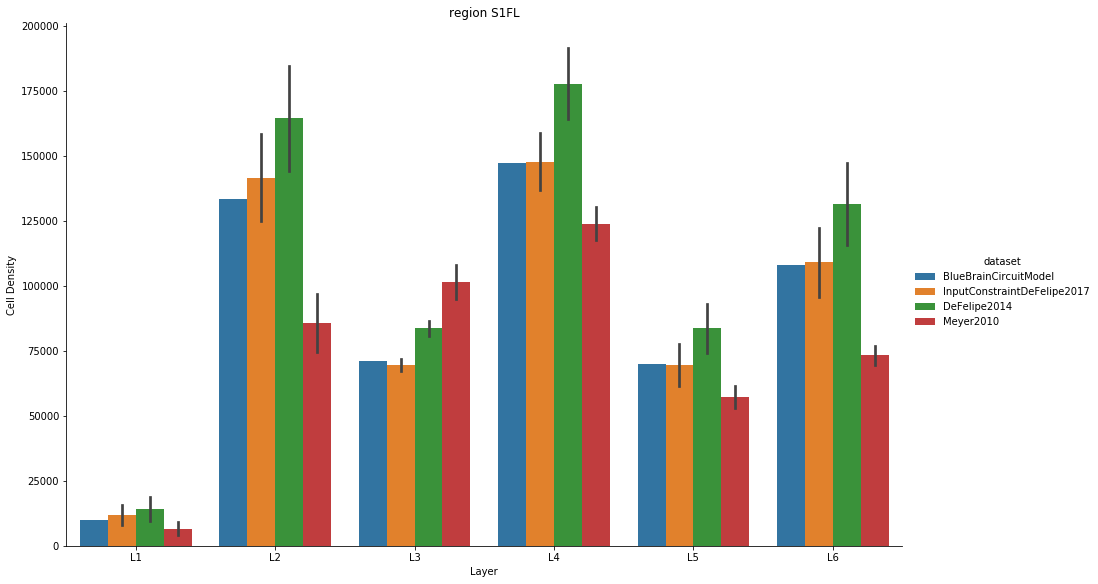

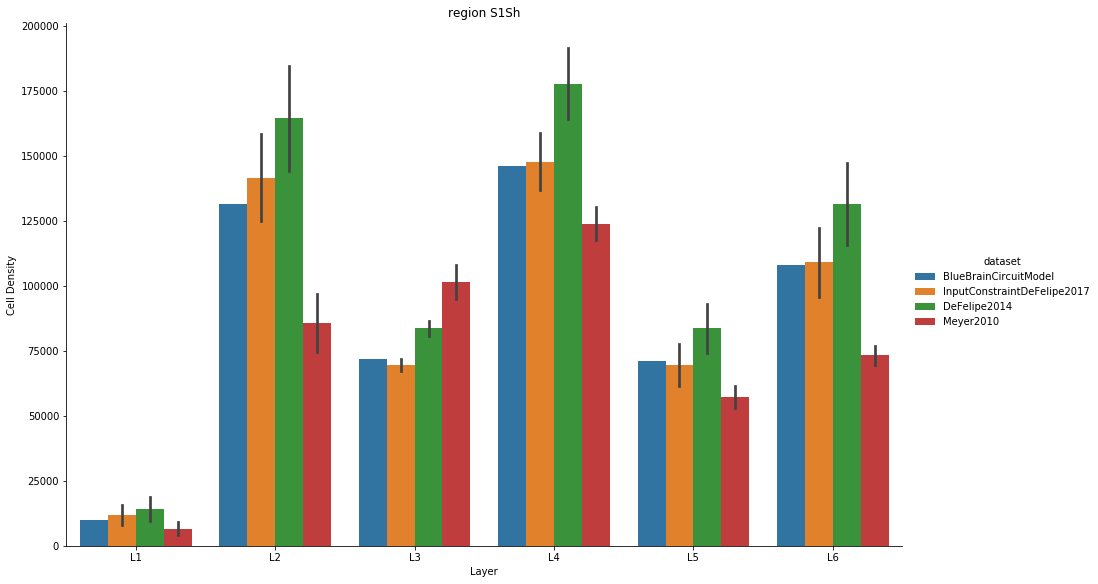

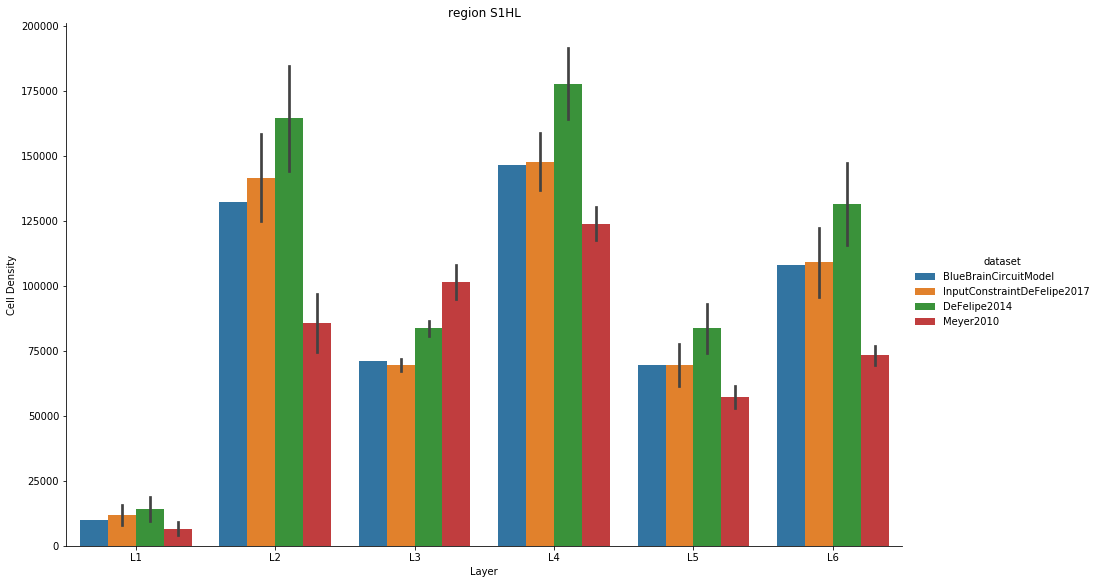

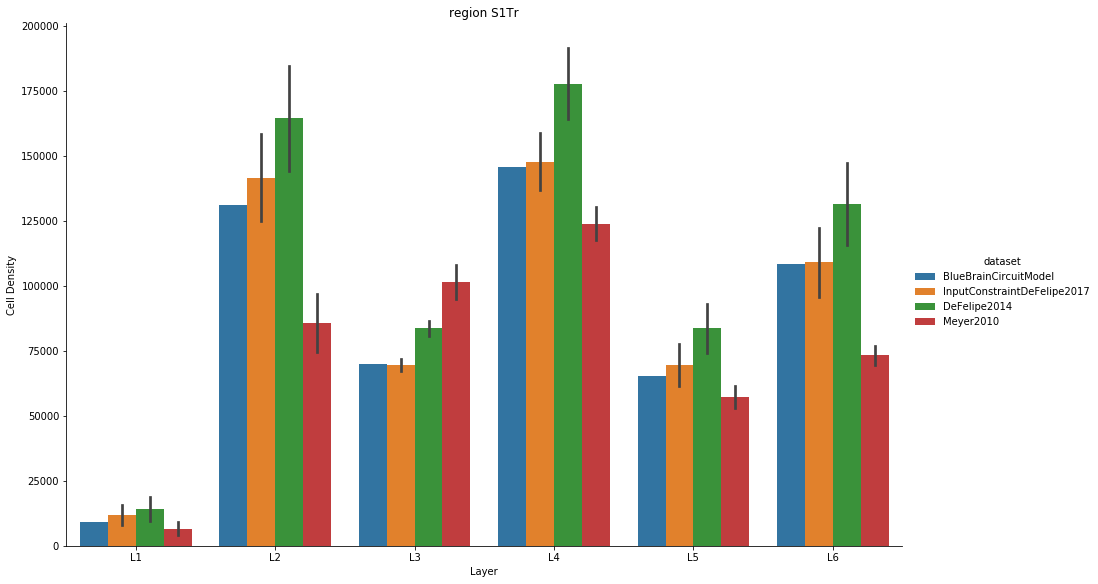

In [5]:
brain_regions =\
    adapter.get_brain_regions(circuit_bio_m)
reference_data_cell_density =\
    suite_composition_analyses.reference_data_cell_density(brain_regions)
cell_density_report =\
    suite_composition_analyses\
        .analysis_cell_density_by_layer_exhaustively(
            circuit_bio_m,
            adapter,
            reference_data=reference_data_cell_density)

In [6]:
reporter_analyses\
    .post(cell_density_report)

'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/reports/analyses/cell_density/20200210/152521'

  0%|          | 0/200 [00:00<?, ?it/s]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.0, 'end': 0.02}}.
                



/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:193: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(begin <= values, values < end)
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:193: RuntimeWarning: invalid value encountered in less
  return np.logical_and(begin <= values, values < end)


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (41242, 3)
            



  0%|          | 1/200 [01:04<3:34:54, 64.80s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.02, 'end': 0.04}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (34673, 3)
            



  1%|          | 2/200 [01:10<2:35:44, 47.19s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.04, 'end': 0.06}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (33990, 3)
            



  2%|▏         | 3/200 [01:17<1:54:33, 34.89s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.06, 'end': 0.08}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (31703, 3)
            



  2%|▏         | 4/200 [01:23<1:26:04, 26.35s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.08, 'end': 0.1}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (30779, 3)
            



  2%|▎         | 5/200 [01:30<1:06:29, 20.46s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.1, 'end': 0.12}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (29894, 3)
            



  3%|▎         | 6/200 [01:36<52:26, 16.22s/it]  

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.12, 'end': 0.14}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (29260, 3)
            



  4%|▎         | 7/200 [01:42<42:40, 13.27s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.14, 'end': 0.16}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (29117, 3)
            



  4%|▍         | 8/200 [01:49<35:42, 11.16s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.16, 'end': 0.18}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (28913, 3)
            



  4%|▍         | 9/200 [01:55<30:48,  9.68s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.18, 'end': 0.2}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (28703, 3)
            



  5%|▌         | 10/200 [02:01<27:38,  8.73s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.2, 'end': 0.22}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (28719, 3)
            



  6%|▌         | 11/200 [02:08<25:03,  7.95s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.22, 'end': 0.24}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (28366, 3)
            



  6%|▌         | 12/200 [02:14<23:27,  7.49s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.24, 'end': 0.26}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (28338, 3)
            



  6%|▋         | 13/200 [02:20<22:00,  7.06s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.26, 'end': 0.28}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (28106, 3)
            



  7%|▋         | 14/200 [02:26<21:03,  6.80s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.28, 'end': 0.3}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (27995, 3)
            



  8%|▊         | 15/200 [02:32<20:22,  6.61s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.3, 'end': 0.32}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (27665, 3)
            



  8%|▊         | 16/200 [02:38<19:37,  6.40s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.32, 'end': 0.34}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (27529, 3)
            



  8%|▊         | 17/200 [02:44<19:15,  6.31s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.34, 'end': 0.36}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (27413, 3)
            



  9%|▉         | 18/200 [02:51<19:01,  6.27s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.36, 'end': 0.38}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (27034, 3)
            



 10%|▉         | 19/200 [02:57<18:44,  6.21s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.38, 'end': 0.4}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (26959, 3)
            



 10%|█         | 20/200 [03:03<18:34,  6.19s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.4, 'end': 0.42}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (26661, 3)
            



 10%|█         | 21/200 [03:09<18:53,  6.33s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.42, 'end': 0.44}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (26509, 3)
            



 11%|█         | 22/200 [03:16<18:57,  6.39s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.44, 'end': 0.46}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (26165, 3)
            



 12%|█▏        | 23/200 [03:23<19:48,  6.71s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.46, 'end': 0.48}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (25972, 3)
            



 12%|█▏        | 24/200 [03:31<20:31,  7.00s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.48, 'end': 0.5}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (25799, 3)
            



 12%|█▎        | 25/200 [03:38<19:57,  6.84s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.5, 'end': 0.52}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (25539, 3)
            



 13%|█▎        | 26/200 [03:45<20:01,  6.90s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.52, 'end': 0.54}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (25254, 3)
            



 14%|█▎        | 27/200 [03:51<19:21,  6.71s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.54, 'end': 0.56}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (24975, 3)
            



 14%|█▍        | 28/200 [03:57<18:48,  6.56s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.56, 'end': 0.58}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (24694, 3)
            



 14%|█▍        | 29/200 [04:04<18:49,  6.61s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.58, 'end': 0.6}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (24539, 3)
            



 15%|█▌        | 30/200 [04:10<18:30,  6.53s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.6, 'end': 0.62}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (24326, 3)
            



 16%|█▌        | 31/200 [04:17<18:15,  6.48s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.62, 'end': 0.64}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (23982, 3)
            



 16%|█▌        | 32/200 [04:23<17:53,  6.39s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.64, 'end': 0.66}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (23657, 3)
            



 16%|█▋        | 33/200 [04:29<18:02,  6.48s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.66, 'end': 0.68}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (23436, 3)
            



 17%|█▋        | 34/200 [04:36<17:48,  6.44s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.68, 'end': 0.7000000000000001}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (23219, 3)
            



 18%|█▊        | 35/200 [04:42<17:48,  6.48s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.7000000000000001, 'end': 0.72}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (22938, 3)
            



 18%|█▊        | 36/200 [04:48<17:23,  6.36s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.72, 'end': 0.74}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (22629, 3)
            



 18%|█▊        | 37/200 [04:55<17:37,  6.49s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.74, 'end': 0.76}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (22322, 3)
            



 19%|█▉        | 38/200 [05:02<17:37,  6.53s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.76, 'end': 0.78}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (22132, 3)
            



 20%|█▉        | 39/200 [05:08<17:10,  6.40s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.78, 'end': 0.8}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (21870, 3)
            



 20%|██        | 40/200 [05:14<16:54,  6.34s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.8, 'end': 0.8200000000000001}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (21659, 3)
            



 20%|██        | 41/200 [05:21<16:57,  6.40s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.8200000000000001, 'end': 0.84}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (21484, 3)
            



 21%|██        | 42/200 [05:27<16:44,  6.36s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.84, 'end': 0.86}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (21440, 3)
            



 22%|██▏       | 43/200 [05:34<16:57,  6.48s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.86, 'end': 0.88}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (21381, 3)
            



 22%|██▏       | 44/200 [05:40<16:55,  6.51s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.88, 'end': 0.9}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (21856, 3)
            



 22%|██▎       | 45/200 [05:47<16:40,  6.46s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.9, 'end': 0.92}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (23089, 3)
            



 23%|██▎       | 46/200 [05:53<16:14,  6.33s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.92, 'end': 0.9400000000000001}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (26762, 3)
            



 24%|██▎       | 47/200 [05:59<16:07,  6.32s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.9400000000000001, 'end': 0.96}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (27630, 3)
            



 24%|██▍       | 48/200 [06:05<16:04,  6.35s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.96, 'end': 0.98}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (23801, 3)
            



 24%|██▍       | 49/200 [06:11<15:47,  6.27s/it]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.98, 'end': 1.0}}.
                

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-10 12:11:29>                                                 

            get_voxel_positions for voxel_ids of shape (5853, 3)
            



100%|██████████| 200/200 [14:01<00:00,  4.21s/it]


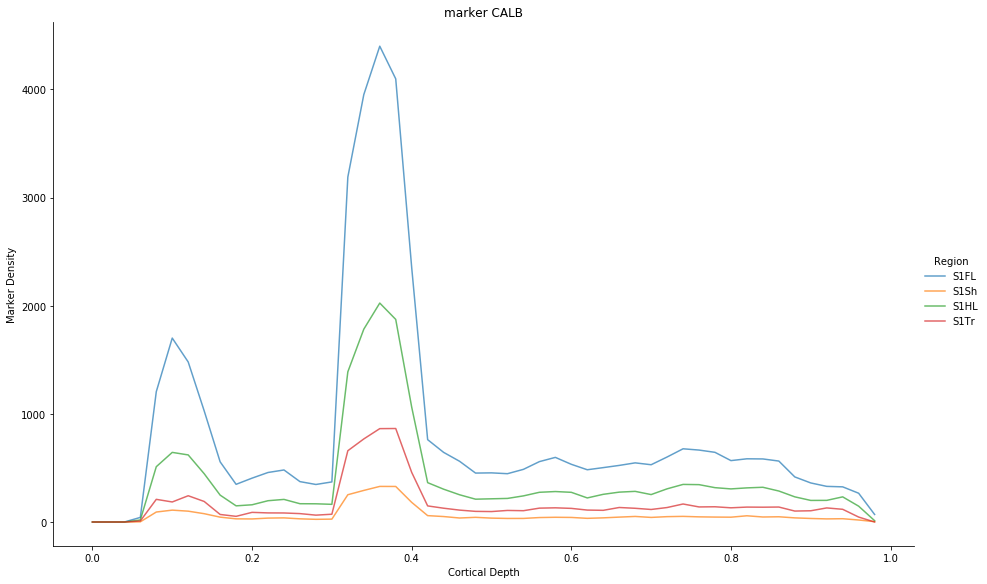

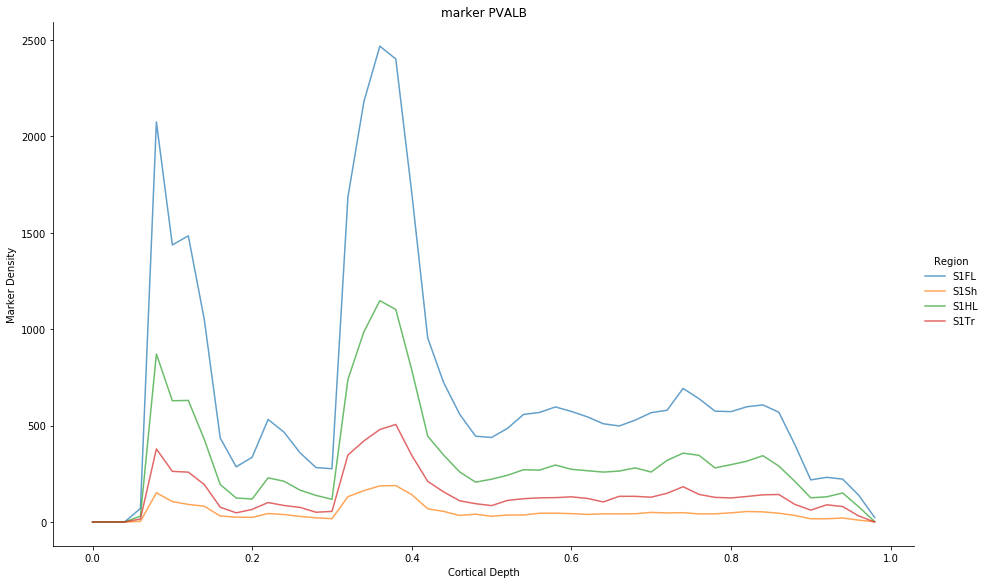

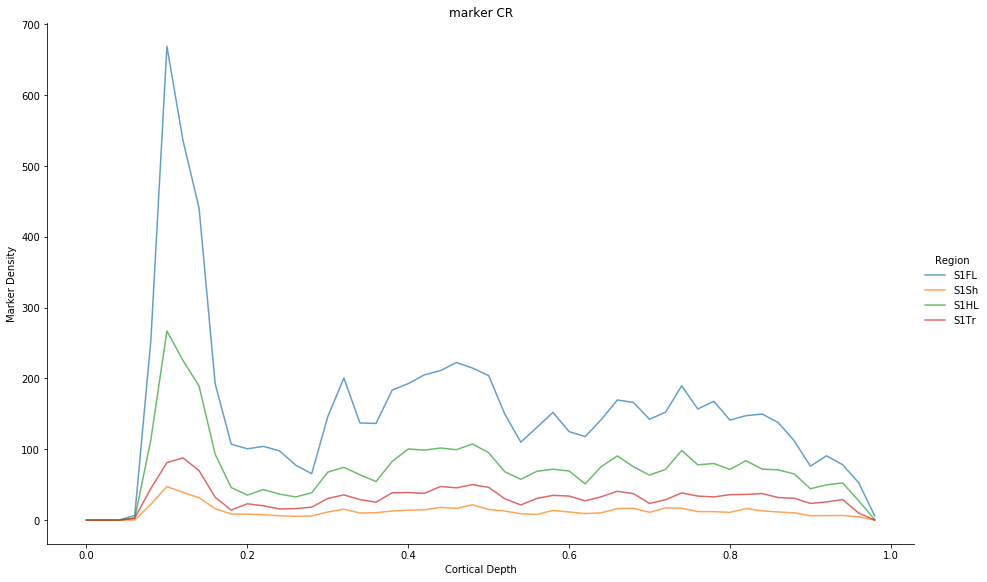

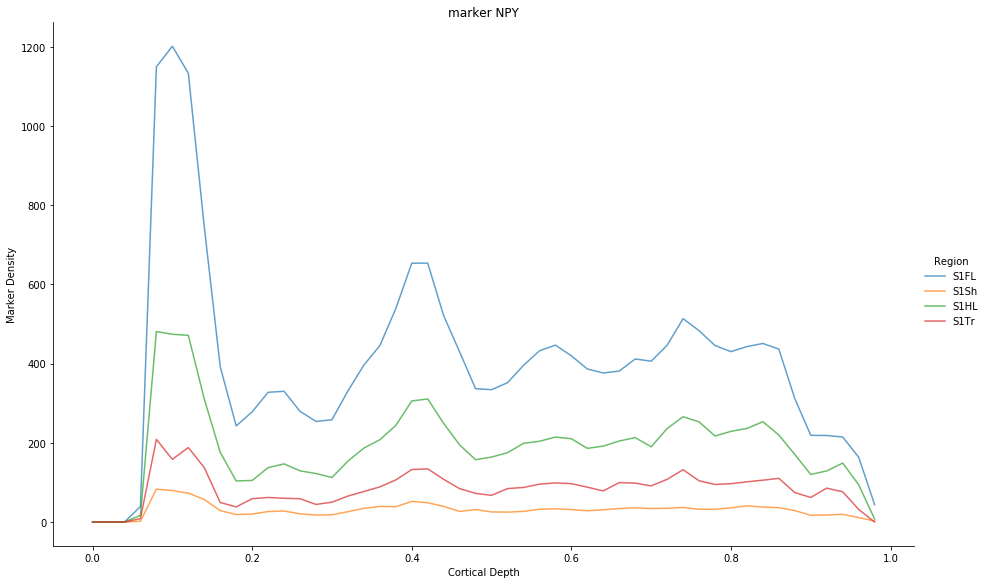

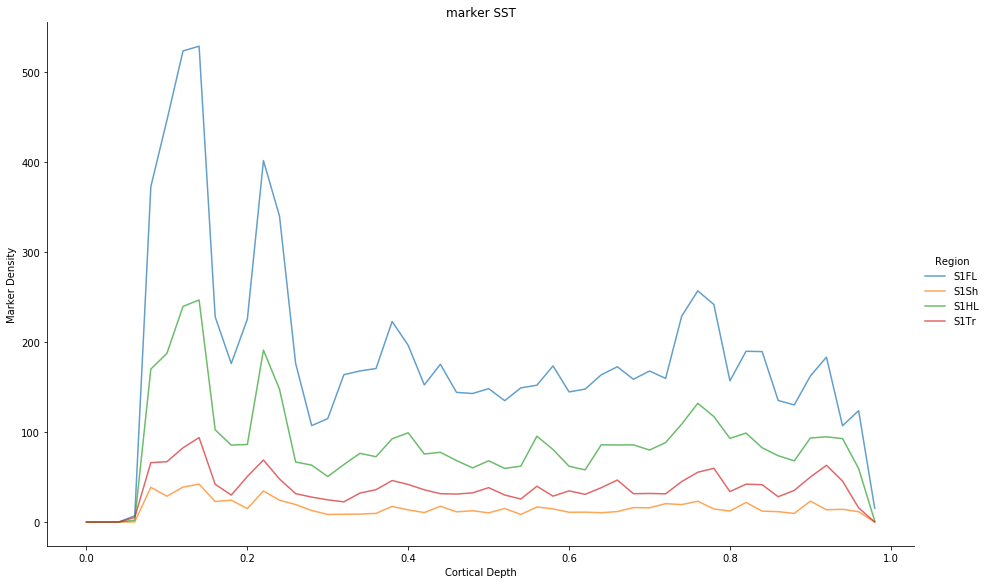

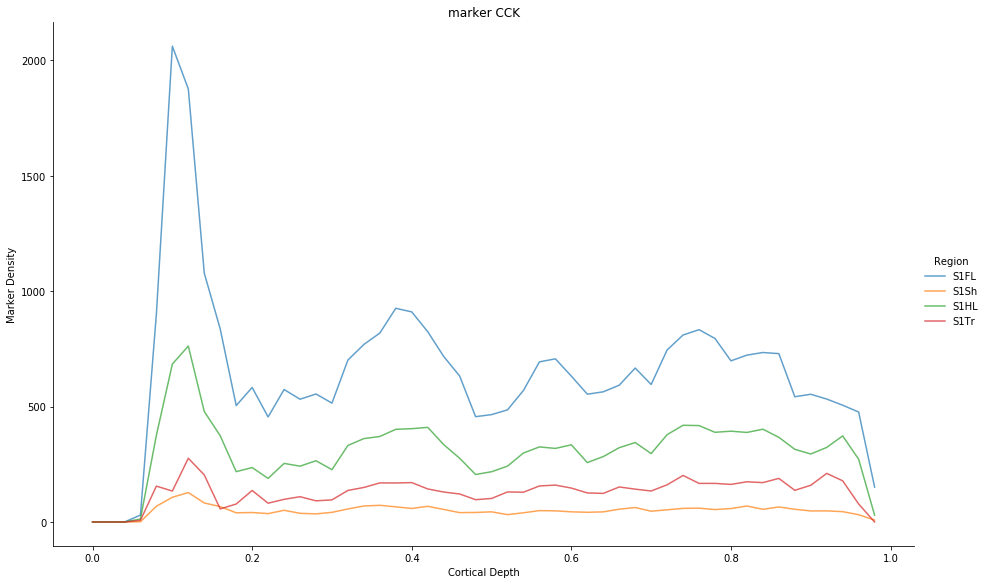

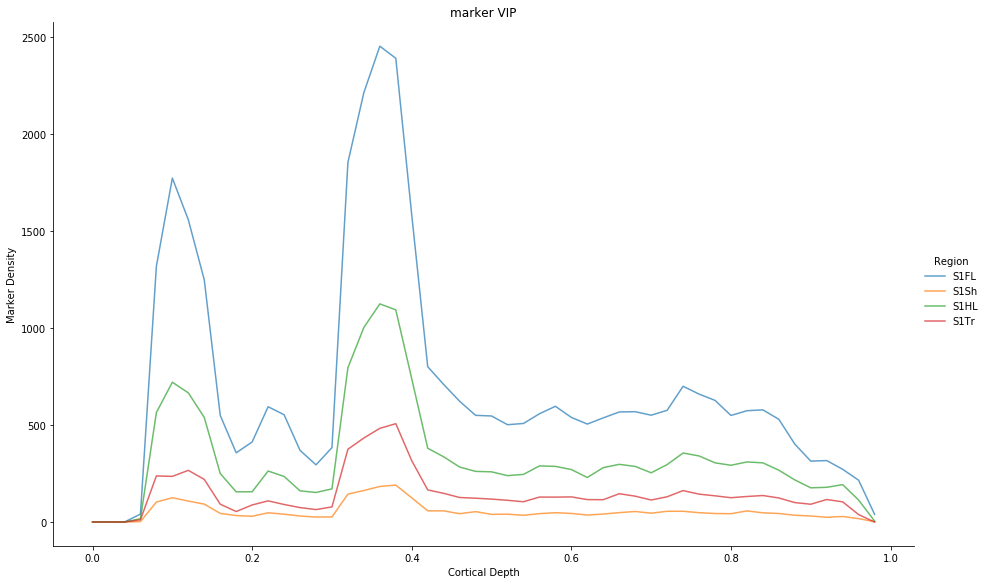

In [5]:
report_marker_density =\
    suite_composition_analyses\
        .analysis_marker_stains_by_depth_exhaustively(
            circuit_bio_m,
            adapter)

In [6]:
reporter_analyses\
    .post(report_marker_density)

'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/reports/analyses/marker_density/20200210/123854'

In [ ]:
composition_analyses.measurement_mtype_cell_density_exhaustively(
    circuit_bio_m,
    adapter,
    layer="L1",
    region="S1HL")

In [ ]:
cell_counts =\
    cells.groupby(
        ["region", "layer", "mtype"]1
    ).agg(
        "size"
    )
cell_counts.xs(
    ("S1HL", 1),
    level=("region", "layer"))

In [ ]:
cell_counts.xs(
    ("S1FL", 2), level=("region", "layer")
)/cell_counts.xs(
    ("S1HL", 2), level=("region", "layer")
)

In [ ]:
cell_counts.xs(
    ("S1HL", 2), level=("region", "layer"))

In [ ]:
from neuro_dmt.analysis.reporting import CheetahReporter
from neuro_dmt import terminology

cd_rd =\
    composition_analysis.reference_data_cell_density(
                                adapter.get_brain_regions(circuit_bio_m))
cd_measurement =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter,
            reference_data=cd_rd,
            sampling_methodology=terminology.sampling_methodology.random,
            sample_size=2)
            
cd_report =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_report(
            cd_measurement,
            reference_data=cd_rd,
            figures={},
            **adapter.get_provenance(circuit_bio_m))


In [ ]:
from neuro_dmt import terminology
inh_fraction_report =\
    composition_analysis\
        .analysis_inihibitory_cell_fraction_by_layer_overall(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
inh_fraction_report.measurement

In [ ]:
print(rat.defelipe2017.data.shape)
rat.defelipe2017.data.groupby("layer").agg(["size", "mean", "std"])

In [ ]:
defelipe_2017 =\
    data_plotting[
        data_plotting.dataset == "DeFelipe2017"]
print(defelipe_2017.shape[0])
defelipe_2017\
    .groupby("layer")\
    .agg(["mean", "std"])

In [ ]:
seaborn.barplot(
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
).set(
    xlabel="Layer",
    ylabel="Cell Density")

In [ ]:
seaborn.catplot(
    kind="bar",
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
)

In [ ]:
import seaborn
data =\
    cd_report.measurement\
        .groupby(["layer", "region"])\
        .agg(["mean", "std"])\
        .reset_index()
data.head()
seaborn.barplot(
    x="layer",
    y=("cell_density", "mean"),
    hue="region",
    data=data)

In [ ]:
overall_cd_m =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
overall_cd_m

In [ ]:
from neuro_dmt import terminology
overall_cd =\
    cell_density_analysis(
        circuit_bio_m,
        adapter,
        sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *
bars = Bars(
    xvar="layer",
    xlabel="Layer",
    yvar="cell_density",
    ylabel="Cell Density",
    gvar="dataset")

In [ ]:
cell_density_measurement =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter)

In [ ]:
cell_density_analysis.get_figures(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
cdard =\
    cell_density_analysis\
        ._with_reference_data(
            cell_density_measurement["data"])

In [ ]:
cdard["DeFelipe2014"]

In [ ]:
from dmt.data.observation import measurement
measurement.concat_as_samples(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *

cell_density_analysis =\
    BrainCircuitAnalysis(
        phenomenon=composition_analysis.phenomenon_cell_density,
        AdapterInterface=composition_analysis.AdapterInterface,
        reference_data=composition_analysis.sampled_reference_data(
            composition_analysis.reference_data_cell_density),
        measurement_parameters=composition_analysis.parameters_regions_and_layers,
        sample_measurement=composition_analysis.sample_measurement_cell_density,
        plotter=MultiPlot(
            mvar="region",
            plotter=Bars(
                xvar="layer",
                xlabel="Layer",
                yvar="cell_density",
                ylabel="Cell Density",
                gvar="dataset")),
        report=CircuitAnalysisReport)

In [ ]:
cell_density_analysis(circuit_bio_m, adapter)

In [ ]:
parameter_values =\
    cell_density_analysis\
        .measurement_parameters


In [ ]:
parameter_values

In [ ]:
class Test:
    def __init__(self,value):
        if not isinstance(value, Test):
            self.value = value
        else:
            self.value = value.value
            

In [ ]:
test = Test(10)
test_2 = Test(test)

In [ ]:
test_2 == test

In [ ]:
import pandas as pd
from dmt.tk.parameters import Parameters

regions = ["S1HL", "S1FL"]
layers = range(1,7)
regions_and_layers =\
    pd.DataFrame({
        "region": [r for r in regions for _ in layers],
        "layer": [l for _ in regions for l in layers]})
p0 = Parameters(regions_and_layers)
p1 = Parameters(p0)

In [ ]:
p1.values

In [ ]:
(43345060) ** (1./3.)

In [ ]:
regions_and_layers =\
    composition_analysis\
        .parameters_regions_and_layers

In [ ]:
regions_and_layers._resolve_values(adapter, circuit_bio_m)